In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Data Exploration

In [2]:
# read data
raw_train_df = pd.read_csv(r'./datasrc/train.csv')
print(raw_train_df.shape)
print(raw_train_df.groupby(['YrSold'])['MoSold'].agg(['min', 'max', 'count']))

raw_test_df = pd.read_csv(f'./datasrc/test.csv')
print(raw_test_df.shape)
print(raw_test_df.groupby(['YrSold'])['MoSold'].agg(['min', 'max', 'count']))

(1460, 81)
        min  max  count
YrSold                 
2006      1   12    314
2007      1   12    329
2008      1   12    304
2009      1   12    338
2010      1    7    175
(1459, 80)
        min  max  count
YrSold                 
2006      1   12    305
2007      1   12    363
2008      1   12    318
2009      1   12    309
2010      1    7    164


In [3]:
raw_train_df.shape

(1460, 81)

In [4]:
raw_train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### explore sale price

YrSold
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalePrice, dtype: object

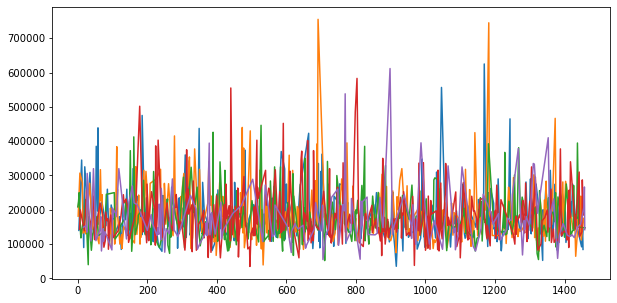

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
raw_train_df.groupby(raw_train_df['YrSold'])['SalePrice'].plot(ax=ax)

In [6]:
# there seems to be some outliers in the dataset
raw_train_df.loc[raw_train_df['SalePrice'] > 500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [7]:
# we will drop these massive outliers till we further investigate
# the reason for such high evaluation
raw_train_df = raw_train_df.loc[raw_train_df['SalePrice'] <= 500000]
raw_train_df.shape

(1451, 81)

### check for missing values

In [8]:
# get columns with null values if any
cols_with_missing = [col for col in raw_train_df.columns if raw_train_df[col].isnull().any()]
print(cols_with_missing)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
# get % of missing values in the columns
for col in cols_with_missing:
    missing_val_ct = raw_train_df.loc[raw_train_df[col].isnull(), col].shape[0]
    print(f"{col} === {missing_val_ct/1451*100}")

LotFrontage === 17.849758787043417
Alley === 93.72846312887664
MasVnrType === 0.5513439007580978
MasVnrArea === 0.5513439007580978
BsmtQual === 2.5499655410062028
BsmtCond === 2.5499655410062028
BsmtExposure === 2.6188835286009646
BsmtFinType1 === 2.5499655410062028
BsmtFinType2 === 2.6188835286009646
Electrical === 0.06891798759476223
FireplaceQu === 47.55341144038594
GarageType === 5.582356995175741
GarageYrBlt === 5.582356995175741
GarageFinish === 5.582356995175741
GarageQual === 5.582356995175741
GarageCond === 5.582356995175741
PoolQC === 99.58649207443143
Fence === 80.70296347346657
MiscFeature === 96.27842866988284


### handle missing values for categorical columns

In [10]:
def fill_missing_values(df):
    # for columns Alley, PoolQC, Fenc and MiscFeature
    # a null value indicates no feature 
    # for example when Fence is null it indicates no fence
    # when MiscFeature is null, it indicates no misc feature
    df = df.copy()
    
    df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NoBasement', axis=1)
    
    # handle missing values for garage
    df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NoGarage', axis=1)
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    
    # handle missing masonary veneer type
    df['MasVnrType'] = df['MasVnrType'].fillna('NoMasVnrType')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    
    # handle rest of object columns
    for col in ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']:
        df[col] = df.fillna(f"No{col}")
        
    df['Electrical'] = df['Electrical'].fillna('NotKnown')
    
    return df

In [11]:
raw_train_df = fill_missing_values(raw_train_df)

### handle missing values for numeric columns

In [12]:
from sklearn.impute import KNNImputer

# impute missing values with knn algorithm
q = KNNImputer(missing_values = np.nan, n_neighbors=20, weights='uniform')
raw_train_df['LotFrontage'] = q.fit_transform(raw_train_df['LotFrontage'].astype(float).values.reshape(-1, 1))

# Data Prep

In [13]:
# drop id column
raw_train_df.drop(['Id'], inplace=True, axis=1)

# convert target variable to log
raw_train_df['SalePrice'] = np.log(raw_train_df['SalePrice'])

In [14]:
# convert all object columns to categorical
for n, c in raw_train_df.items():
    if not pd.api.types.is_numeric_dtype(c):
        c = c.astype('category')
        raw_train_df[n] = c.cat.codes+1

In [15]:
raw_train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,2,1,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,5,4,3,706,7,0,150,856,2,1,2,6,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,1,2,2003.0,3,2,548,6,6,3,0,61,0,0,0,0,1,1,1,0,2,2008,9,5,12.247694
1,20,4,80.0,9600,2,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,4,0.0,4,5,2,3,5,2,1,978,7,0,284,1262,2,1,2,6,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,2,2,1976.0,3,2,460,6,6,3,298,0,0,0,0,0,2,2,2,0,5,2007,9,5,12.109011
2,60,4,68.0,11250,2,3,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,5,3,3,486,7,0,434,920,2,1,2,6,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,2,2001.0,3,2,608,6,6,3,0,42,0,0,0,0,3,3,3,0,9,2008,9,5,12.317167
3,70,4,60.0,9550,2,4,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,4,0.0,4,5,1,5,2,4,1,216,7,0,540,756,2,3,2,6,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,6,1998.0,4,3,642,6,6,3,0,35,272,0,0,0,4,4,4,0,2,2006,9,1,11.849398
4,60,4,84.0,14260,2,5,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,5,1,3,655,7,0,490,1145,2,1,2,6,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,3,3,836,6,6,3,192,84,0,0,0,0,5,5,5,0,12,2008,9,5,12.429216


### Train test split

In [16]:
from sklearn.model_selection import train_test_split

#raw_train_df.drop(['Id'], axis=1, inplace=True)
X = raw_train_df.drop(['SalePrice'], axis=1)
y = raw_train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelling

## fit initial model - random forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=30, max_features=0.5)
m.fit(X_train, y_train)
# score the test set data
m.score(X_test, y_test)

0.8627015240357556

### fit initial model - linear regression

In [19]:
from sklearn.linear_model import LinearRegression
l = LinearRegression(n_jobs=-1)
l.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [20]:
l.score(X_test, y_test)

0.8505404457876942

In [21]:
from sklearn.metrics import mean_squared_error
pred_a = l.predict(X_test)
mean_squared_error(y_test,pred_a)

0.02302745993280957

# Further Data Exploration

In [22]:
sns.set_style('whitegrid')
raw_train_df = pd.read_csv(r'./datasrc/train.csv')


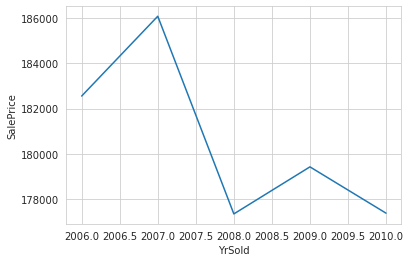

In [23]:
sns.lineplot(x='YrSold', y='SalePrice', data=raw_train_df.groupby(raw_train_df['YrSold'], as_index=False)['SalePrice'].mean())

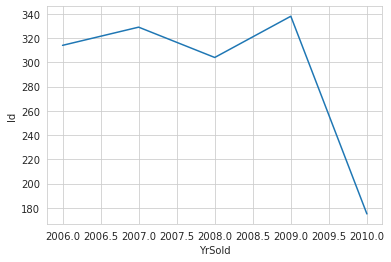

In [24]:
sns.lineplot(x='YrSold', y='Id', data=raw_train_df.groupby(raw_train_df['YrSold'], as_index=False)['Id'].count())

## check co-linearity

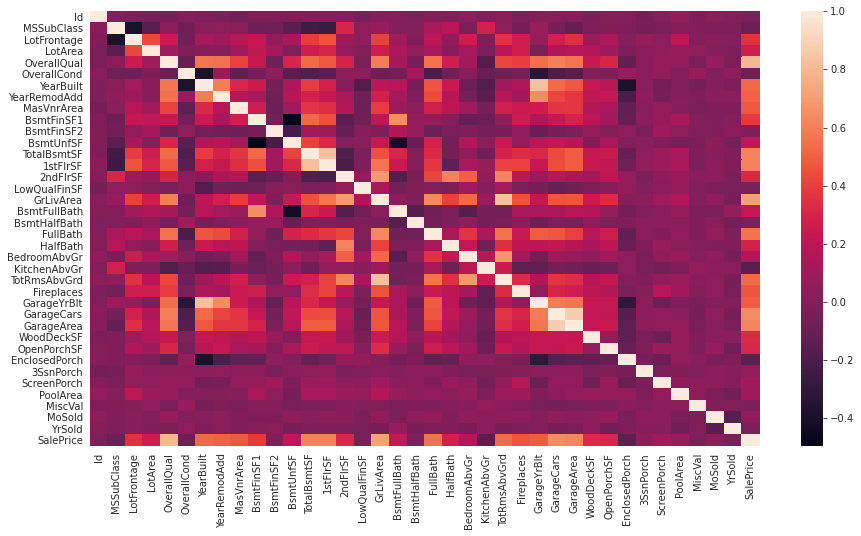

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_train_df.corr())

## check distributions

In [26]:
# raw_train_df.hist(figsize=(20, 20))
# plt.show()

# Feature Engineering

for feature engineering, we will:
    - fill missing data
    - perform power transformation on all numeric columns
    - convert objects to categorical cols

In [27]:
# fill missing data

# first drop id column
# drop id column
raw_train_df.drop(['Id'], inplace=True, axis=1)

# convert target variable to log
raw_train_df['SalePrice'] = np.log(raw_train_df['SalePrice'])

# there seems to be some outliers in the dataset
raw_train_df = raw_train_df.loc[raw_train_df['SalePrice'] <= 500000]

# handle missing object data
raw_train_df = fill_missing_values(raw_train_df)

# handle missing numeric column
from sklearn.impute import KNNImputer

# impute missing values with knn algorithm
q = KNNImputer(missing_values = np.nan, n_neighbors=20, weights='uniform')
raw_train_df['LotFrontage'] = q.fit_transform(raw_train_df['LotFrontage'].astype(float).values.reshape(-1, 1))

# create new column
raw_train_df['totalArea'] = raw_train_df['TotalBsmtSF'] + raw_train_df['1stFlrSF'] + raw_train_df['2ndFlrSF'] + raw_train_df['GrLivArea']
raw_train_df['totalBath'] = raw_train_df['FullBath'] + raw_train_df['HalfBath']

In [28]:
# perform power transformations

numeric_cols = list(raw_train_df.select_dtypes(include=np.number).columns)
numeric_cols.remove('SalePrice')
print(numeric_cols)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

data = pt.fit_transform(raw_train_df[numeric_cols])
# convert the array back to a dataframe
raw_train_df[numeric_cols] = pd.DataFrame(data, columns=numeric_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'totalArea', 'totalBath']


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [29]:
# raw_train_df.hist(figsize=(20, 20))
# plt.show()


raw_train_df.loc[raw_train_df.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,totalArea,totalBath


In [30]:
# convert all object to numeric
for n, c in raw_train_df.items():
    if not pd.api.types.is_numeric_dtype(c):
        c = c.astype('category')
        raw_train_df[n] = c.cat.codes+1
        
# convert target variable to log
# raw_train_df['SalePrice'] = np.log(raw_train_df['SalePrice'])

In [31]:
from sklearn.model_selection import train_test_split

#raw_train_df.drop(['Id'], axis=1, inplace=True)
X = raw_train_df.drop(['SalePrice'], axis=1)
y = raw_train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
l1 = LinearRegression(n_jobs=-1)
l1.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [33]:
l1.score(X_test, y_test)

0.8906564318154568

In [34]:
pred_a1 = l1.predict(X_test)
mean_squared_error(y_test,pred_a1)

0.02040498795669619

## perform PCA

In [35]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(0.95)

In [36]:
x_train_cols = X_train.columns
pca.fit(X_train)

PCA(n_components=0.95)

In [37]:
# number of components
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [x_train_cols[most_important[i]] for i in range(n_pcs)]
most_important_names

['FireplaceQu',
 'Neighborhood',
 'Exterior2nd',
 'GarageType',
 'BsmtFinType1',
 'HouseStyle',
 'HouseStyle',
 'GarageType',
 'LotConfig',
 'SaleType',
 'BsmtFinType2',
 'HeatingQC',
 'Exterior1st',
 'GarageType',
 'LotShape',
 'LotShape',
 'Electrical',
 'MasVnrType',
 'KitchenAbvGr',
 'BsmtHalfBath',
 'PoolArea',
 'Functional',
 '3SsnPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Functional',
 'WoodDeckSF',
 'SaleCondition',
 'LowQualFinSF',
 'PoolArea',
 'EnclosedPorch',
 'YrSold',
 'Condition1',
 'BsmtCond',
 'OpenPorchSF']

In [38]:
train_data = pca.transform(X_train)
test_data = pca.transform(X_test)

In [39]:
train_data.shape

(1168, 36)

In [40]:
len(most_important_names)

36

In [41]:
l2 = LinearRegression(n_jobs=-1)
l2.fit(train_data, y_train)

LinearRegression(n_jobs=-1)

In [42]:
l2.score(test_data, y_test)

0.8769802774922123

## feature importances of the model (l2)

In [43]:
importance = l2.coef_
importance

array([-0.00175707,  0.01603002, -0.0258722 ,  0.08891135, -0.01002959,
        0.01229298,  0.02369891,  0.0362406 , -0.0060849 , -0.00051279,
        0.00207757, -0.00245354, -0.01296564,  0.02866122, -0.01282535,
        0.01753664, -0.01104849, -0.00470544,  0.04225886,  0.00667726,
       -0.01674975, -0.02140365,  0.02424436, -0.00344045, -0.01098874,
       -0.00204833, -0.00927607,  0.00162874, -0.01458791,  0.00602505,
       -0.00373857, -0.00675508, -0.00815587,  0.00604638,  0.00600915,
        0.00331989])

In [44]:
imp_series = pd.Series(importance, index=most_important_names).sort_values()

In [53]:
imp_series

Alley            2.399744e+10
PoolQC           2.376678e+10
totalArea        3.731071e-01
OverallQual      7.648396e-02
CentralAir       5.807087e-02
Street           5.766958e-02
YearBuilt        4.423571e-02
GarageCars       4.398948e-02
OverallCond      4.365736e-02
LandSlope        4.032916e-02
LotArea          3.872442e-02
BsmtFinSF1       2.563667e-02
Functional       2.513763e-02
Fireplaces       1.987433e-02
BsmtFullBath     1.645613e-02
SaleCondition    1.573837e-02
YearRemodAdd     1.551531e-02
Foundation       1.528192e-02
ScreenPorch      1.314032e-02
HalfBath         1.252627e-02
BsmtCond         1.250172e-02
RoofMatl         1.018095e-02
PavedDrive       9.855986e-03
FullBath         9.301186e-03
LandContour      7.996639e-03
WoodDeckSF       7.777929e-03
RoofStyle        7.041216e-03
MasVnrType       6.965399e-03
GarageYrBlt      5.643368e-03
GarageCond       5.334377e-03
ExterCond        5.158067e-03
Exterior2nd      4.262924e-03
3SsnPorch        4.045933e-03
LowQualFin

## feature importance of model (l1)

In [46]:
importance = l1.coef_
importance

array([-1.90679049e-02, -1.87106587e-02, -1.50286160e-02,  3.87244245e-02,
        5.76695752e-02,  2.39974390e+10, -2.24201706e-03,  7.99663939e-03,
       -1.49265265e-01, -8.64505768e-04,  4.03291583e-02,  3.42369080e-04,
        2.42191594e-03, -3.33417058e-02, -9.78899002e-03, -2.95639038e-03,
        7.64839649e-02,  4.36573625e-02,  4.42357063e-02,  1.55153126e-02,
        7.04121590e-03,  1.01809502e-02, -6.81304932e-03,  4.26292419e-03,
        6.96539879e-03, -9.21249390e-04, -2.23979950e-02,  5.15806675e-03,
        1.52819157e-02, -1.64165497e-02,  1.25017166e-02, -9.36841965e-03,
       -2.49862671e-04,  2.56366730e-02,  3.52203846e-04, -5.30481339e-04,
       -1.85441971e-03, -1.10067695e-01, -1.36595815e-02, -3.83710861e-03,
        5.80708683e-02, -2.48056650e-03, -1.00884438e-02, -3.56941223e-02,
        3.39001417e-03, -1.38223350e-01,  1.64561272e-02,  1.67953968e-03,
        9.30118561e-03,  1.25262737e-02, -1.22070312e-03, -1.55096054e-02,
       -2.91700363e-02,  

In [47]:
imp_series = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

In [48]:
#imp_series

## check score

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
pred_a = l1.predict(X_test)

In [51]:
pred_a

array([11.94127095, 12.63456878, 11.67986272, 12.00453017, 12.66737838,
       11.29880587, 12.36869194, 11.85787998, 11.30920864, 11.87076769,
       11.84984099, 11.67261488, 11.47640248, 12.18732088, 12.02160432,
       11.83274008, 12.23600107, 11.77162912, 11.65520716, 12.31594824,
       11.87378744, 12.22171768, 12.12339346, 11.76509891, 12.25375847,
       12.01023699, 12.22753783, 11.55118644, 12.04791046, 12.16659833,
       11.87991373, 12.45501935, 12.02719838, 11.64435003, 12.45802534,
       11.90763089, 11.77265513, 12.28317384, 12.62103853, 11.40989726,
       11.65165675, 12.4004065 , 11.67430098, 12.63729231, 11.74142164,
       11.82114784, 11.53934582, 11.77798746, 12.88249127, 11.76689307,
       11.682948  , 12.23792031, 11.64228225, 12.69715472, 11.88651127,
       12.4202901 , 12.28693789, 12.02335283, 11.81656276, 11.43480278,
       11.01609032, 11.95923432, 12.58013458, 12.45719143, 12.57529644,
       12.31600089, 11.56496533, 12.63015335, 11.63662453, 11.99

In [52]:
mean_squared_error(y_test,pred_a)

0.02040498795669619